In [53]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from math import sqrt
from timeit import default_timer as timer
from sklearn.model_selection import train_test_split
from scipy.special import lambertw

In [257]:
def f(w,x=1.0,y=-1.0):
    return (1/2)*((x*w - y)**2)

# def comp_grad(w):
#   grad = XtX @ w - Xty + (1/n)*w
#   return grad

def grad_f(w,x=1.0,y=-1.0):
    return (x**2)*w - x*y

def gd_HB(w_0, iters, x, y, nu=1):
    w_list = [0,w_0]
    L = x**2
    mu = (x**2)*nu
    kap = L/mu
    eta = 4.0/((sqrt(L) + sqrt(mu))**2)
    beta = (sqrt(kap) - 1)/(sqrt(kap) + 1)
    for i in range(iters):
        w = w_list[i+1] - eta*grad_f(w_list[i+1], x, y) + beta*(w_list[i+1] - w_list[i])
#         w = np.asarray(w).ravel()
        w_list.append(w)
#         if np.linalg.norm(grad_f(w)) <= esp:
#             break
    return w_list

# def HB(w):
#     eta = 4 / np.square(np.sqrt(L) + np.sqrt(m))
#     beta = (np.sqrt(L / m) - 1) / (np.sqrt(L / m) + 1)
#     wk = w
#     wk_prev = 0
#     grad_norms = []

#     for k in range(T):
#         grad_norms.append(np.linalg.norm(comp_grad(wk)))
#         if np.linalg.norm(np.linalg.norm(comp_grad(wk))) < epsilon:
#             break
#         wkk = wk - eta * comp_grad(wk) + beta * (wk - wk_prev)
#         wk_prev = wk
#         wk = wkk
#     return grad_norms

In [258]:
def plot_value_iteration_graph(cg):
    cg_x = [i for i in range(len(cg))]
    
    cg_val = [f(w) for w in cg]
    
    plt.plot(cg_x, cg_val, 'b', label='HB')

    plt.legend()
    plt.title('Function Value - Iteration')

In [259]:
np.random.seed(3)
N = 10
w_0_list = np.random.uniform(-100.0, 100.0, N)
X = np.random.uniform(-100.0, 100.0, N)
Y = np.random.uniform(-100.0, 100.0, N)
ITER = 3000
ESP = 1e-8
X[0]

-94.02475782428661

C:\Users\pc\AppData\Local\Temp\ipykernel_37284\3213287208.py:9: RuntimeWarning: divide by zero encountered in log
  grad_list_true = [np.log(np.absolute(grad_f(w, X[i], Y[i]))) for w in w_list_true]


<Figure size 1200x800 with 0 Axes>

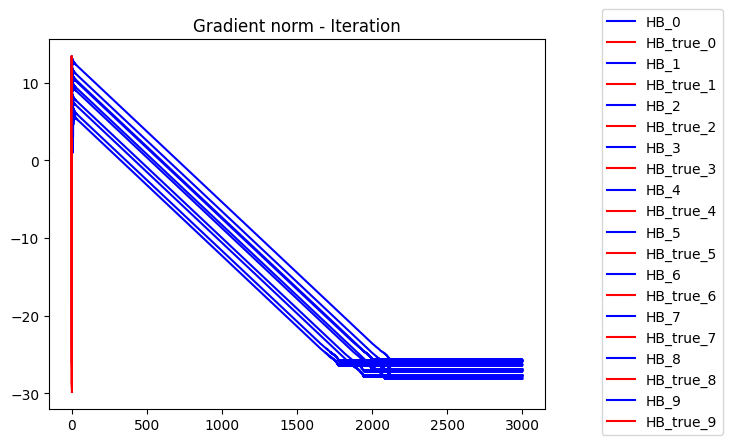

<Figure size 1200x800 with 0 Axes>

In [260]:
ws = []
grads = []
for i in range(len(w_0_list)):
    w_0 = w_0_list[i]
    w_list = gd_HB(w_0, ITER, X[i], Y[i], 100)
    w_list_true = gd_HB(w_0, ITER, X[i], Y[i], 1)
    ws.append(w_list)
    grad_list = [np.log(np.absolute(grad_f(w, X[i], Y[i]))) for w in w_list]
    grad_list_true = [np.log(np.absolute(grad_f(w, X[i], Y[i]))) for w in w_list_true]
    grads.append(grad_list)
    plt.plot(range(0,ITER+2), grad_list, 'b', label='HB_'+str(i))
    plt.plot(range(0,ITER+2), grad_list_true, 'r', label='HB_true_'+str(i))
plt.legend(bbox_to_anchor=(1.1,1.1))
plt.title('Gradient norm - Iteration')
plt.figure(figsize=(15, 10), dpi=80)

In [153]:
for i in range(5):
    print(ws[i][-20:])
    print(grads[i][-20:])
# ws[3][-20:]

[-1.1863032746462927, -1.1863032746462923, -1.1863032746462927, -1.1863032746462923, -1.1863032746462927, -1.1863032746462923, -1.1863032746462927, -1.1863032746462923, -1.1863032746462927, -1.1863032746462923, -1.1863032746462927, -1.1863032746462923, -1.1863032746462927, -1.1863032746462923, -1.1863032746462927, -1.1863032746462923, -1.1863032746462927, -1.1863032746462923, -1.1863032746462927, -1.1863032746462923]
[array([-58.79972731,   8.58054419,   6.28869056,   9.81361797,
         1.84100269]), array([-58.49142595,   8.58054419,   6.28869056,   9.81361797,
         1.84100269]), array([-58.79972731,   8.58054419,   6.28869056,   9.81361797,
         1.84100269]), array([-58.49142595,   8.58054419,   6.28869056,   9.81361797,
         1.84100269]), array([-58.79972731,   8.58054419,   6.28869056,   9.81361797,
         1.84100269]), array([-58.49142595,   8.58054419,   6.28869056,   9.81361797,
         1.84100269]), array([-58.79972731,   8.58054419,   6.28869056,   9.81361797,

In [252]:
# Size of the matrix
n = 10000
d = 20
kappa = 100
min_ei = 50.0
max_ei = min_ei*kappa
tW = np.random.rand(d, 1)

q, _ = np.linalg.qr(np.random.rand(d, d))
eigenvalues = np.linspace(np.sqrt(min_ei*n), np.sqrt(max_ei*n), d)
D = np.diag(eigenvalues)
symmetric_part = np.dot(np.dot(q, D), q.T)
non_symmetric_part = np.random.rand(n-d, d)
A = np.vstack((symmetric_part, non_symmetric_part))

ATA = np.dot(A.T, A)
Y = np.matmul(A, tW)
ATY = np.dot(A.T, Y)
Ws = np.matmul(np.linalg.inv(ATA), ATY)
y = Y.reshape(n,)
print(A.shape)
print(y.shape)

(10000, 20)
(10000,)


In [253]:
X, X_test, y_train, y_test = train_test_split(A, y, test_size=0.2, random_state=1, shuffle=False)

In [254]:
eigvals=sc.linalg.svdvals(np.matmul(A.T,A))
Lmax,Lmin=1./n * np.amax(eigvals), 1./n * np.amin(eigvals)
print("Lmax: %f,Lmin:%f,kappa:%f"%(Lmax,Lmin,Lmax/Lmin))

Lmax: 5000.085132,Lmin:54.147638,kappa:92.341703


In [255]:
eigvals=sc.linalg.svdvals(np.matmul(X.T,X))
Lmax,Lmin=1./(n*0.8) * np.amax(eigvals), 1./(n*0.8) * np.amin(eigvals)
print("Lmax: %f,Lmin:%f,kappa:%f"%(Lmax,Lmin,Lmax/Lmin))

Lmax: 6250.085233,Lmin:66.650451,kappa:93.774087


In [41]:
def max_T(kap):
    a = 3*(2**10)*kap*np.sqrt(kap)/np.log(2)
    b = 3*(2**8)*(np.e**2)*np.sqrt(kap)/np.log(2)
    return int(np.ceil(max(a,b)))

def stages(kap, T):
    res = np.floor(np.real(lambertw(T*np.log(2)/(2*384*np.sqrt(kap))))/np.log(np.sqrt(2)))
    return int(res)

def ls_stages(kap, T):
    m_T = max_T(kap)
    I = stages(kap, m_T)
    ls = [0]
    for i in range(1,I+1):
#         if i==0:
#             ls.append(np.ceil(m_T/2))
#         else:
            t = (2**(i/2))*np.sqrt(kap)*(((i/2)+5)*np.log(2)+np.log(kap)/2) * 4/((2 - np.sqrt(2))*15)
            ls.append(int(np.ceil(t)))
    T_I = np.sum(ls)
    if T_I > T:
        raise ValueError('T must be greater than '+str(T_I))
    ls[0] = T - T_I
    ls_stage = np.cumsum(ls)
    return ls, ls_stage
    

In [77]:
def a(k):
    # if k ==0 : return  1./L
    # return 1. / (2 ** (k+1) * L)
    return 1./(2.0**(k))

140151

In [118]:
max_T(200)

12535474

In [75]:
ls_stages(45, 4000)

([105, 25, 38, 56, 83, 123, 182, 270, 398, 587, 864, 1269],
 array([ 105,  130,  168,  224,  307,  430,  612,  882, 1280, 1867, 2731,
        4000]))

In [130]:
ls_stages(100, 4)

([479, 785, 1261, 1997, 3127], array([ 479, 1264, 2525, 4522, 7649]))

In [131]:
ls_stages(200, 4)

([731, 1185, 1890, 2976, 4637], array([  731,  1916,  3806,  6782, 11419]))